Exercise 3 (from ISLP chapter 3.7)
---

a) Our current model is described as: \\
Salary = 50 + 20⋅GPA + 0.07⋅IQ + 35⋅Level + 0.01⋅GPA⋅IQ - 10⋅GPA⋅Level

Now for fixed GPA and IQ we have: \\

*   High school graduates, Level = 0 \\
so we have **Salary = 50 + 20⋅GPA + 0.07⋅IQ + 0.01⋅GPA⋅IQ** \\
*   High school graduates, Level = 1 \\
Salary = 50 + 20⋅GPA + 0.07⋅IQ + 35 + 0.01⋅GPA⋅IQ - 10⋅GPA => \\
  **Salary = 85 + 10⋅GPA + 0.07⋅IQ + 0.01⋅GPA⋅IQ**

Now we can see there is a difference in the intercept between the two levels of graduates. BUT the effect of GPA as it increases will ultimately have a bigger impact on the salary of high school graduates than for college graduates. \\
Thus the correct answer is (iii). \\


---


b) Solving the model equation described in (a) for IQ = 110 and GPA = 4.0 we have and Level = 1 (college graduate): \\

Salary = 50 + 20⋅GPA + 0.07⋅IQ + 35⋅Level + 0.01⋅GPA⋅IQ - 10⋅GPA⋅Level => \\
Salary = 50 + 20⋅4 + 0.07⋅110 + 35 + 0.01⋅4⋅110 - 10⋅4 = 50 + 80 + 7.7 + 35 + 4.4 - 40 => \\
Salary =  137.1

---


c) False: the coefficient being small is not relevant to the existence of an interaction effect. The size of the coefficient has to do with the magnitude of the effect and not wether it is statistically significant. \\
In order to determine wether there is strong evidence for the interaction effect we would need to evaluate something like the coefficient's p-value which is not given. \\





Exercise 8 (from ISLP chapter 3.7)
---


a)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
auto = pd.read_csv('sample_data/Auto.csv')

In [ ]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
print(auto[['horsepower', 'mpg']].isna().sum())
print(np.isinf(auto[['horsepower', 'mpg']]).sum())

horsepower    5
mpg           0
dtype: int64
horsepower    0
mpg           0
dtype: int64


In [ ]:
auto.dropna(subset=['horsepower', 'mpg'], inplace=True)

In [ ]:
X = auto['horsepower']
y = auto['mpg']
X = sm.add_constant(X)

In [ ]:
model_8a = sm.OLS(y, X).fit()
print(model_8a.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        23:20:02   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [ ]:
hp_value = 98
pred98 = model_8a.get_prediction(sm.add_constant(np.array([hp_value]), has_constant='add'))
pred_summary_98 = pred98.summary_frame(alpha=0.05)
predicted_value = pred_summary_98['mean'][0]
conf_interval = pred_summary_98[['mean_ci_lower', 'mean_ci_upper']].values[0]
pred_interval = pred_summary_98[['obs_ci_lower', 'obs_ci_upper']].values[0]

print(f"Predicted MPG for horsepower = {hp_value}: {predicted_value:.2f}")
print(f"95% Confidence Interval: {conf_interval}")
print(f"95% Prediction Interval: {pred_interval}")

Predicted MPG for horsepower = 98: 24.47
95% Confidence Interval: [23.97307896 24.96107534]
95% Prediction Interval: [14.80939607 34.12475823]


**i)** \\
Relationship between predictor and response. \\
The p-value for horsepower is effectively zero which indicates that there is a  relationship between this predictor and the response MPG, and their relationship is statistically significant. \\
**ii)** \\
 R squared value indicates that 0.606 of the variability in MPG is attributed to horsepower which indicates a strong relationship between the two. \\
**iii)** \\
The coefficient for horsepower is -0.1578 which indicates a negative relationship between the two. So as horsepower increases mpg tends to decrease. \\
**iv)** \\
 For a horsepower of 98 the predicted mpg is \\
mpg = 39.9359 - 0.1578⋅horsepower=> \\
mpg = 39.9359 - 0.1578⋅98 => \\
mpg = 39.9359 - 15.4644 = 24.4715 mpg \\
And we can see in the output above the same result plus the confidence and prediction intervals \\
95% Confidence Interval: {23.97307896, 24.96107534} \\
95% Prediction Interval: {14.80939607 34.12475823}


---





Exercise 10 (from ISLP chapter 3.7)
---


**a)** \\
Multiple regression model on Carseats dataset to predict Sales using Price, Urban and US.

In [ ]:
carseats = pd.read_csv('sample_data/Carseats.csv')

In [ ]:
#converting 'yes/no' values to numeric 1/0
carseats_new = pd.get_dummies(carseats, columns=['Urban', 'US'], drop_first=True)
carseats_new['Urban_Yes'] = carseats_new['Urban_Yes'].astype(int)
carseats_new['US_Yes'] = carseats_new['US_Yes'].astype(int)

In [ ]:
X = carseats_new[['Price', 'Urban_Yes', 'US_Yes']]
y = carseats_new['Sales']

In [ ]:
X = sm.add_constant(X)
model_10a = sm.OLS(y, X).fit()
print(model_10a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        23:20:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

**b)** \\


1. Price coeff = -0.0545: The negative coefficient suggest that as Price increases Sales tend to decrease (while holding Urban and US values constant).
2. Urban coeff = -0.0219: Again the coeffiecient here is negative which means that when Urban value is 1('Yes') the response is expected to decrease (while holding Price and US values constant). However the p-value here is 0.936 which is really high, meaning that the coefficient is not statistically significant and its effect is not meaninful in practice.
3. US coeff = 1.2006: the coeffiecient here is positive which means that when US value is 1('Yes') the response is expected to increase (while holding Price and Urban values constant).
4. Intercept coeff = 13.0435: This value gives us the base value of Sales, so the value of Sales for Price = 0, Urban = 'No', US = 'No'. \\
**c)** \\
The model in equation form: \\
$Sales = \beta_0 + \beta_1\cdot Price + \beta_2\cdot Urban + \beta_3\cdot US ⇒$ \\
$Sales = 13.0435 - 0.0545\cdot Price - 0.0219\cdot Urban + 1.2006\cdot US$ \\
**d)** \\
To determine which predictors allow you to reject the null hypothesis
$H_0: \beta_j = 0$ we can look at the p-values associated with each predictor's coefficient in the output. The null hypothesis
$H_0: \beta_j = 0$ states that a predictor j has no effect on the response variable. A small p-value indicates strong evidence against the null hypothesis, suggesting that the predictor significantly contributes to the model. \\
You can reject the null hypothesis for the predictors Price and US, as their p-values are significantly low. For Urban, the high p-value indicates that you cannot reject the null hypothesis, suggesting no significant effect on Sales.

**e)**

In [ ]:
X = carseats_new[['Price', 'US_Yes']]
y = carseats_new['Sales']
X = sm.add_constant(X)
model_10e = sm.OLS(y, X).fit()
print(model_10e.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        23:20:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

**f)** \\
The following table compares statistical measures for the two models

|Metric            |Model with Price, US, and Urban| Model with Price and US |
|------------------|-------------------------------|-------------------------|
|R-squared         | 0.239                         |                   0.239 |
|Adjusted R-squared| 0.234                         |                   0.235 |
|AIC               | 1863                          |                    1861 |
|BIC               | 1879                          |                    1873 |
|F-statistic       | 41.52                         |                   62.43 |
|p-value           | 2.39e-23                      |                2.66e-24 |

* R-squared: \\
Both models have the same R-squared value (0.239), which means that they explain the same proportion of the variance in Sales. The addition of Urban in the first model doesn't improve the ability to explain the variance in Sales.
* Adjusted R-squared: \\
The model with only Price and US has a slightly higher Adjusted R-squared than the model with Urban. Adjusted R-squared penalizes the model for adding irrelevant predictors, so this suggests that including Urban might not add much value.
* AIC: \\
The AIC for the 2nd model is slightly lower than the AIC of the 1st model. Lower AIC values indicate a better model fit when penalizing for the number of parameters.
* BIC: \\
The BIC is also slightly lower for the 2nd model compared to the 1st model. Like AIC, a lower BIC indicates a better fit when penalizing for the number of predictors.
* F-statistic: \\
The F-statistic is higher for the model with only Price and US than for the model with Price, US, and Urban. A higher F-statistic indicates a stronger overall model fit, and the p-values for both models are very low, indicating that both models are statistically significant.

Conclusion:
Model with Price and US fits the data just as well as the model with Price, US, and Urban.
Including Urban as a predictor does not improve the model's performance and may even slightly decrease the model's fit, as indicated by the lower Adjusted R-squared and slightly higher AIC/BIC.

Exercise 14 (from ISLP chapter 3.7)
---

**a)**

In [ ]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The linear model can be written in the form of a multiple linear regression equation:
$y = \beta_0 + \beta_1\cdot x_1 + \beta_2\cdot x_2 + \epsilon$ \\
Where:
* $y$ is the response variable
* $x_1$ and $x_2$ are the predictor variables
* $ \beta_0, \beta_1, \beta_2$ are the regression coefficients.
* $\epsilon$ is the random error term, normally distributed. \\

The final form is: \\
$y = 2 + 2\cdot x_1 + 0.3\cdot x_2 + \epsilon$ \\
The regression coefficients are:
* $ \beta_0 = 2$ : intercept
* $ \beta_1 = 2$ : coefficient for $x_1$
* $ \beta_2 = 0.3$ : coefficient for $x_2$


---

**b)**

In [ ]:
correlation = np.corrcoef(x1, x2)[0, 1]
print(correlation)

0.772324497691354


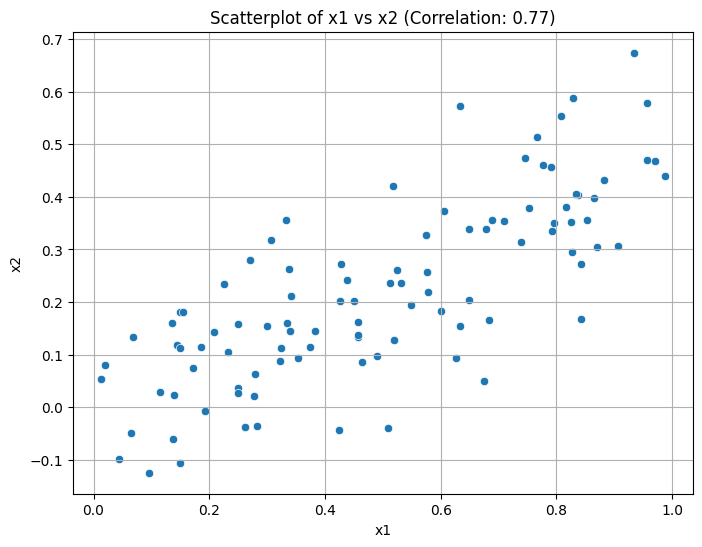

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x1, y=x2)
plt.title(f'Scatterplot of x1 vs x2 (Correlation: {correlation:.2f})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

The correlation between $x_1$ and $x_2$ is approximately 0.77.

---

**c)**

In [ ]:
X = pd.DataFrame({'x1': x1, 'x2' : x2})
X = sm.add_constant(X)

In [ ]:
model_14c = sm.OLS(y, X).fit()
print(model_14c.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           5.76e-08
Time:                        23:20:04   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

The stat model regression model has computed the following:
* $\hat{\beta}_0 = 1.9579$, while we have $\beta_0 = 2$, which is very close, meaning the model's prediction for the intercept is accurate.
* $\hat{\beta}_1 = 1.6154$, while we have $\beta_1 = 2$, indicating the model slightly underestimates the effect of $x_1$ on $y$.
* $\hat{\beta}_2 = 0.9428$, while we have $\beta_2 = 0.3$, indicating the model overestimates the effect of $x_2$ on $y$. The large standard error
(0.831) indicates that this estimate is less reliable.

---

* For $x_1$ the p-value is 0.003, which is less than the typical significance level of 0.05. This means we can reject the null hypothesis for $x_1$. Thus, there is significant evidence to conclude that $x_1$ has an impact on $y$.
* For $x_2$ the p-value is 0.259, which is greater than 0.05. This means we cannot reject the null hypothesis for $x_2$, implying that there is no significant evidence to conclude that $x_2$ has an impact on $y$

---

**d)** \\

In [ ]:
X = pd.DataFrame({'x1': x1})
X = sm.add_constant(X)
model_14d = sm.OLS(y, X).fit()
print(model_14d.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.37e-08
Time:                        23:20:04   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

**Comments** \\
The R-squared slightly increases from 0.281 to 0.291 when adding $x_2$ to the model. This shows that $x_2$ explains a small effect on y. \\
The p-value for the coefficient of $x_1$ remains low which indicates statistical significance. \\
The magnitude of the $x_1$ coefficient decreases when $x_2$ is added to the model, indicating that $x_2$ is explaining some of the variation previously attributed to $x_1$ alone. The reduced significance also reflects this. \\
The AIC and BIC are slightly worse in the model with both $x_1$ and $x_2$, suggesting that adding $x_2$ does not improve the model significantly. \\
Adding $x_2$ to the model only marginally improves the model. The simpler model using only $x_1$ is likely more appropriate in this case. \\
**Null hypothesis** \\
In this model also, the p-value for $x_1$ is very small (0.000), meaning we can reject the null hypothesis $\beta_1 = 0$, and conclude that $x_1$ significantly affects $y$.

---

**e)** \\

In [ ]:
X = pd.DataFrame({'x2': x2})
X = sm.add_constant(X)
model_14e = sm.OLS(y, X).fit()
print(model_14e.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           7.43e-07
Time:                        23:20:04   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

**Comments** \\
The model explains about 22.2% of the variance in $y$ using only $x_2$. This is lower than the R-squared from the $x_1$-only model, indicating that $x_1$ is a better predictor of $y$ than $x_2$. \\
Both the AIC and BIC are higher than in the $x_1$-only model. Higher AIC/BIC values indicate that the model with $x_2$ only is less efficient than the model using $x_1$. \\
The coefficient for $x_2$ is larger than that for  $x_1$, but this does not imply $x_2$ is a better predictor, as indicated by the lower R-squared for the $x_2$ model. \\
So $x_1$ seems to be a better predictor of $y$ than $x_2$, based on model fit statistics and the R-squared values. \\
**Null hypothesis** \\
In this model, the p-value for $x_2$ is very small (0.000), meaning we can reject the null hypothesis $\beta_1 = 0$, and conclude that $x_2$ significantly affects $y$ in this model.

---

**f)** \\
The results obtained in (c)-(e) seem to contradict each other, as we rejected the null hypothesis for the coefficient of $x_2$ in the $x_2$ only model, but we couldn't do the same in the model using both $x_1$ and $x_2$.

In the $x_2$-only model: \\
$x_2$ is the only predictor of $y$, so any relationship between $x_2$ and $y$ is captured by the regression.

In the model with both $x_1$ and $x_2$:

$x_1$ and $x_2$ are correlated cause $x_2$ is partly derived from $x_1$ ($x_2$ = 0.5 * $x_1$ + noise). So the two variables provide overlapping information. When both $x_1$ and $x_2$ are included in the model, $x_1$ may explain much of the variation in $y$ that $x_2$ was explaining in the $x_2$-only model. Because of this overlap, the p-value for $x_2$ may increase in the model that includes both $x_1$ and $x_2$, and when the p-value increases higher than 0.005 we cannot reject the null hypothesis meaning that $x_2$ is no longer statistically significant after accounting for $x_1$.

In conclusion, $x_2$ may appear significant when it's the only predictor, but not when $x_1$ is also present, as $x_1$ explains much of the same variance in $y$.

---

**g)**

In [ ]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = pd.DataFrame({'x1': x1, 'x2' : x2})
X = sm.add_constant(X)
model_14g12 = sm.OLS(y, X).fit()
print(model_14g12.summary())

X = pd.DataFrame({'x1': x1})
X = sm.add_constant(X)
model_14g1 = sm.OLS(y, X).fit()
print(model_14g1.summary())

X = pd.DataFrame({'x2': x2})
X = sm.add_constant(X)
model_14g2 = sm.OLS(y, X).fit()
print(model_14g2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           4.60e-08
Time:                        23:20:04   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

|Metric            | $x_1,x_2$-Model | $x_1,x_2$-Model (with new observation)|
|------------------|-----------------|-------------|
|$\beta_0$         | 1.9579          |      2.0618 |
|$\beta_1$         | 1.6154          |      0.8575 |
|$\beta_2$         | 0.9428          |      2.2663 |
|R-squared         | 0.291           |       0.292 |
|Adjusted R-squared| 0.276           |       0.277 |
|AIC               | 267.2           |       276.6 |
|BIC               | 275.1           |       284.5 |
|F-statistic       | 19.89           |       20.17 |
|p-value           | 5.76e-08        |    4.60e-08 |

---

|Metric            | $x_1$-Model     | $x_1$-Model (with new observation)|
|------------------|-----------------|-------------|
|$\beta_0$         | 1.9371          |      2.0739 |
|$\beta_1$         | 2.0771          |      1.8760 |
|R-squared         | 0.281           |       0.217 |
|Adjusted R-squared| 0.274           |       0.209 |
|AIC               | 266.6           |       284.7 |
|BIC               | 271.8           |       290.0 |
|F-statistic       | 38.39           |       27.42 |
|p-value           | 1.37e-08        |    9.23e-07 |

---

|Metric            | $x_2$-Model     | $x_2$-Model (with new observation)|
|------------------|-----------------|-------------|
|$\beta_0$         | 2.3239          |      2.2840 |
|$\beta_1$         | 2.9103          |      3.1458 |
|R-squared         | 0.222           |       0.267 |
|Adjusted R-squared| 0.214           |       0.260 |
|AIC               | 274.5           |       278.0 |
|BIC               | 279.7           |       283.3 |
|F-statistic       | 27.99           |       36.10 |
|p-value           | 7.43e-07        |    3.13e-08 |

---

The new observation appears to have a significant impact on the models:

For the model using both $x_1$ and $x_2$, the coefficients for both predictors changed, and the model fit improved slightly (R-squared and Adjusted R-squared have slightly increased), indicating that the new observation affects the estimated relationships between both predictors and the response.

For the model using only $x_1$, the model fit decreased significantly (R-squared: previous 0.281, now 0.217), and the coefficient for $x_1$ reduced, suggesting that $x_1$'s predictive power has diminished with the new observation.

For the model using only $x_2$, the model fit improved, and the coefficient for $x_2$ increased, suggesting that $x_2$ has become a stronger predictor of $y$ with the new observation.

In [ ]:
X_12 = sm.add_constant(np.column_stack([x1, x2]))
X_1 = sm.add_constant(x1)
X_2 = sm.add_constant(x2)

# Predicted values and residuals
y_pred_12 = model_14g12.predict(X_12)
y_pred_1 = model_14g1.predict(X_1)
y_pred_2 = model_14g2.predict(X_2)
residuals_12 = y - y_pred_12
residuals_1 = y - y_pred_1
residuals_2 = y - y_pred_2

# Residual for the new observation
new_observation = np.array([1, 0.1, 0.8])  # Including intercept
new_y_pred_12 = model_14g12.predict(new_observation.reshape(1, -1))
new_observation = np.array([1, 0.1])
new_y_pred_1 = model_14g1.predict(new_observation.reshape(1, -1))
new_observation = np.array([1, 0.8])
new_y_pred_2 = model_14g2.predict(new_observation.reshape(1, -1))
new_residual_12 = 6 - new_y_pred_12
new_residual_1 = 6 - new_y_pred_1
new_residual_2 = 6 - new_y_pred_2

print(f"New observation residual (x1, x2): {new_residual_12}")
print(f"New observation residual (x1): {new_residual_1}")
print(f"New observation residual (x2): {new_residual_2}")

New observation residual (x1, x2): [2.03939547]
New observation residual (x1): [3.73845493]
New observation residual (x2): [1.19930923]


In [ ]:
std_residuals_12 = residuals_12 / np.std(residuals_12)
std_residuals_1 = residuals_1 / np.std(residuals_1)
std_residuals_2 = residuals_2 / np.std(residuals_2)

print(f"Standardized residual (x1, x2): {new_residual_12 / np.std(residuals_12)}")
print(f"Standardized residual (x1): {new_residual_1 / np.std(residuals_1)}")
print(f"Standardized residual (x2): {new_residual_2 / np.std(residuals_2)}")

Standardized residual (x1, x2): [2.20772901]
Standardized residual (x1): [3.84902165]
Standardized residual (x2): [1.2764789]


In [ ]:
influence = model_14g12.get_influence()
leverage12 = influence.hat_matrix_diag
influence = model_14g1.get_influence()
leverage1 = influence.hat_matrix_diag
influence = model_14g2.get_influence()
leverage2 = influence.hat_matrix_diag

new_observation_idx = len(y) - 1  # Index of the new observation
new_leverage12 = leverage12[new_observation_idx]
new_leverage1 = leverage1[new_observation_idx]
new_leverage2 = leverage2[new_observation_idx]

In [ ]:
p = X_12.shape[1]  # Number of predictors including intercept
n = X_12.shape[0]  # Number of observations
average_leverage12 = p / n
p = X_1.shape[1]  # Number of predictors including intercept
n = X_1.shape[0]  # Number of observations
average_leverage1 = p / n
p = X_2.shape[1]  # Number of predictors including intercept
n = X_2.shape[0]  # Number of observations
average_leverage2 = p / n

high_leverage_threshold12_1 = 2 * average_leverage12
high_leverage_threshold12_2 = 3 * average_leverage12
high_leverage_threshold1_1 = 2 * average_leverage1
high_leverage_threshold1_2 = 3 * average_leverage1
high_leverage_threshold2_1 = 2 * average_leverage2
high_leverage_threshold2_2 = 3 * average_leverage2

# Check if the new observation is high-leverage
print(f"New observation leverage (x1, x2): {new_leverage12} - Thresholds: {high_leverage_threshold12_1} , {high_leverage_threshold12_2}")
print(f"New observation leverage (x1): {new_leverage1} - Thresholds: {high_leverage_threshold1_1} , {high_leverage_threshold1_2}")
print(f"New observation leverage (x2): {new_leverage2} - Thresholds: {high_leverage_threshold2_1} , {high_leverage_threshold2_2}")

New observation leverage (x1, x2): 0.34767161961426646 - Thresholds: 0.0594059405940594 , 0.0891089108910891
New observation leverage (x1): 0.030283401255103554 - Thresholds: 0.039603960396039604 , 0.0594059405940594
New observation leverage (x2): 0.1102066358797133 - Thresholds: 0.039603960396039604 , 0.0594059405940594


* $x_1,x_2$-model

 Given that the standardized residual is 2.21, which is greater than the typical threshold of ±2, the new observation is potentially an outlier based on its residual and is potentially influential. Therefore, this residual suggests that the new observation is an outlier in the context of your regression model.

 A leverage of 0.35, which is well above the low threshold of 0.06, indicates that the observation has a significant influence on the model and may pull the regression line towards it, affecting the fit of the model.

 In summary, yes the observation is a high leverage point and likely an outlier

* $x_1$-model

 The observation has a high standardized residual of 3.85, which suggests it is an outlier in terms of its response.

 However, the low leverage (0.03 with low threshold 0.04) indicates that it is not exerting a large influence on the regression model.

 In summary, while the observation is an outlier with a high standardized residual, it does not have high leverage.

* $x_2$-model

 The observation has a moderate standardized residual (1.3), suggesting it is not a strong outlier but still somewhat unusual.

 The leverage is also moderate (0.11 with low threshold 0.04), meaning it has some influence.

 In summary, these values suggest that the observation is somewhat influential and is somewhat different from the model's predictions, it is not a significant outlier or a high leverage point.